# Procesamiento de datos
Fecha: 27 Abril 2022<br>
Clase: 9

## Indice

1. Procesado de textos <br>
1.1. Regular expressions <br>
1.1.1. Convertir texto a minúsculas <br>
1.1.2. Eliminar o convertir números <br>
1.1.3. Eliminar la puntuación <br>
1.1.4. Eliminar espacios en blanco <br>
1.1.5. Reemplazar patrones <br>
1.2. Tokenización <br>
1.3. Eliminar stop words <br>
1.4. Stimming <br>
1.5. Lematización <br>
2. Bag of words <br>
2.1. Similaridad <br>
3. Ejercicio: Clasificador de noticias sobre COVID como verdaderas o falsas.<br>


----
## 1. Procesamiento de textos

En esta sección introduciremos los pasos básicos típicos del procesamiento de textos. Estos pasos de procesamiento de datos textuales son necesarios para transferir texto del lenguaje humano a un formato legible por una máquina para su posterior procesamiento y uso con algoritmos de aprendizaje automático. Los pasos de preprocesamiento de un problema dependen principalmente del problema en sí, por lo que no es necesario aplicar todos los pasos a todos los problemas.
Para ello, usaremos la biblioteca NLTK (Natural Language Toolkit).

Importamos las librecias que vamos a utilizar:

In [ ]:
import nltk
import string
import re

### Convertir texto a minúsculas:

Para reducir el tamaño del vocabulario de nuestros datos de texto, pasamos todo el texto a minúsculas. 

**Ejercicio:** Crea un texto de ejemplo que contenga mayusculas y pásalo a minúsculas con .lower.

In [1]:
# Creamos un texto de ejemplo
texto_0 = 'HoLa doN PepiTO'

### Eliminar o convertir números:

Dependiendo del problema que queramos solucionar, puede ser mas interesante eliminar los números o convertirlos a texto.

**Ejercicio:** Crea un texto de ejemplo que contenga números. Como los eliminarias? Usa la librería "re". Ahora, convierte los números a texto usando la librería inflect.

### Eliminar la puntuación:

Eliminamos los signos de puntuación para no tener diferentes formas de la misma palabra. Si no eliminamos la puntuación, entonces "hola", "hola!", "hola!!", "hola?" serán contabilizadas como palabras diferentes.

**Ejercicio:** Crea un texto de ejemplo que contenga signos de puntuación. Como los eliminarias? Puedes usar la librería "str".

In [ ]:
# Texto de ejemplo
texto_0 = " Hola, don Pepito. Hola, don José. ¿Pasó usted ya por casa? ¡Por su casa yo pasé!"

Ojo! Comprueba si esto detecta también los signos de exclamación y las interrogaciones al principio de la frase. **Ejercicio:** Como podrías solucionarlo?

In [29]:
# Texto de ejemplo
texto_0 = " Hola, don Pepito. Hola, don José. ¿Pasó usted ya por casa? ¡Por su casa yo pasé!"

### Como quitar la puntuación:
    https://www.geeksforgeeks.org/how-to-remove-string-accents-using-python-3/

### Eliminar espacios en blanco:

En algunos casos, tener muchos espacios en blanco seguimos puede resultar en un problema de espacio. En el mejor de los casos, es probablemente innecesario.

**Ejercicio:** Crea un texto con espacios largos entre palabras y eliminalos. Podemos usar la función join y split para eliminar todos los espacios en blanco en una cadena.

In [28]:
texto_0 = " Hola     don Pepito. Hola, don  José  . "

'Hola don Pepito. Hola, don José .'

'HoladonPepito.Hola,donJosé.'

### Reemplazar patrones:
    
Si vemos que algún patrón se repite que no aporta información, podemos eliminarlo o reemplazarlo.

**Ejercicio:** Crea un texto con un patrón repetido asdf. Como lo eliminarias? Como lo reemplazarias por "patron_plasta"?

In [30]:
texto_0 = " Hola don Pepito asdf. Hola, don José asdf. Pasó usted ya por casa? asdf Por su casa yo pasé! asdf"

' Hola don Pepito . Hola, don José . Pasó usted ya por casa?  Por su casa yo pasé! '

### Tokenización 

La tokenización es el proceso de dividir un texto en las unidades más pequeñas que tengan significado, por ejemplo en palabras. A estas unidades mínimas con significado las denominaremos tokens. En castellano esta división se realiza mediante espacios o signos de puntuación, pero existen idiomas como el Alemán, el Euskera o el Japonés donde se agrupan las palabras, y esta tarea es mucho más complicada.

Esto suele ser un paso previo para algunos procesados que veremos a continuación.

**Ejercicio:** Utiliza word_tokenize de nltk.tokenize para tokenizar en palabas nuestro texto de ejemplo.



In [47]:
## Nota: si os da un error diciendo algo como que Resource 'tokenizers/punkt/english.pickle' not found. En una celda en el
## notebook haced:
# import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [35]:

texto_0 = " Hola don Pepito. Hola, don José. Pasó usted ya por casa? Por su casa yo pasé!"


['Hola',
 'don',
 'Pepito',
 '.',
 'Hola',
 ',',
 'don',
 'José',
 '.',
 'Pasó',
 'usted',
 'ya',
 'por',
 'casa',
 '?',
 'Por',
 'su',
 'casa',
 'yo',
 'pasé',
 '!']

### Eliminar stopwords:

Las palabras stopwords son palabras que no contribuyen al significado de una oración. Por lo tanto, pueden eliminarse con seguridad sin causar ningún cambio en el significado de la oración. La biblioteca NLTK tiene un conjunto de palabras vacías y podemos usarlas para eliminar palabras vacías de nuestro texto y devolver una lista de tokens de palabras.

**Ejercicio:** Carga stopwords de nltk.corpus. Cuales son las stopwords en castellano de este diccionario? Crea un texto de ejemplo con algunas de estas palabras y eliminalas. Para ello, puedes convertir el texto en tokens primero.

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

### Stemming: Reducir las palabras a su raíz.

Stemming es el proceso de obtener la raíz de una palabra. La raíz es la parte a la que se le añaden los afijos flexivos en ingles (-ed, -ize, -de, -s, etc.). La raíz de una palabra se crea eliminando el prefijo o el sufijo de una palabra. Por lo tanto, derivar una palabra puede no resultar en palabras reales.

Análogamente, en castellano, wl stemming consiste en sustituir cada palabra por su forma más básica, eliminando
prefijos, sufijos, etc...

Ejemplo: <br>
books      --->    book <br>
looked     --->    look <br>
denied     --->    deni <br>
flies      --->    fli <br>

 
Si el texto no está en tokens, entonces debemos convertirlo en tokens. Una vez que hemos convertido las cadenas de texto en tokens, podemos convertir la palabra tokens en su forma de raíz. Existen principalmente tres algoritmos para la lematización. Estos son el Porter Stemmer, el Snowball Stemmer y el Lancaster Stemmer. Porter Stemmer es el más común entre ellos.

In [51]:
texto_0 = "This is an example with the words book books booked booking"
# En castellano no funciona muy allá....
# texto_0 = "Esto es un ejemplo con las palabras libro librito libre libros"

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
 
# stem words in the list of tokenized words

word_tokens = word_tokenize(texto_0)
stems = [stemmer.stem(word) for word in word_tokens]
stems
 


['thi',
 'is',
 'an',
 'exampl',
 'with',
 'the',
 'word',
 'book',
 'book',
 'book',
 'book']

### Lematización:

La lematización tiene el mismo objetivo que el stemming (convertir una palabra a su raíz) solo que de forma más correcta desde el punto de vista lingüístico (sustituye cada palabra por su lema, es decir, la raíz pertenece al idioma). Aunque da mejores resultados, la lematización es mucho más lenta ya que requiere el análisis sintáctico de cada oración.

**Ejercicio:** Utiliza el texto anterior como ejemplo para probar la lematización. En NLTK, usamos WordNetLemmatizer para obtener los lemas de las palabras. También puede que necesitamos proporcionar un contexto para la lematización. Entonces, agregamos la parte del discurso como parámetro pos ='v'. Cual es la diferencia entre usarlo o no?

['This',
 'be',
 'an',
 'example',
 'with',
 'the',
 'word',
 'book',
 'book',
 'book',
 'book']

Nota: la librería textacy también puede ser muy útil para estas tareas, además permite detectar el idioma con textacy.text_utils.detect_language()


## Bag of words

Para trabajar con lenguaje natural necesitaremos poder traducir el texto a algo que pueda ser entendido por los algoritmos
predictivos, es decir, traducir las unidades de significado (letras, palabras, conjuntos de palabras) a formato numérico.
Si trabajamos con palabras, una primera idea sería asignar a cada palabra un número. A esto se le llama vectorizar y funciona de forma parecida a one-hot encoding.

El modelo bolsa de palabras (o bag-of-words) crea un vector para cada instancia sumando todas las palabras que aparecen en el texto de cada instancia.


In [53]:
import pandas as pd
data = [['Me gusta desayunar cafe con galletas', 17], 
        ['Le gusta comer filete con ensalada', 25],
        ['Te gusta cenar colacao con galletas', 15], 
        ['Te gusta comer pasta con tomate y cenar tomate en ensalada', 15], 
        ['Me gusta desayunar avena con leche', 14],
        ['Me gusta ese camion. Lleva avena y leche', 14]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['gustos', 'Edad'])
 
# print dataframe.
df

,gustos,Edad
0,Me gusta desayunar cafe con galletas,17
1,Le gusta comer filete con ensalada,25
2,Te gusta cenar colacao con galletas,15
3,Te gusta comer pasta con tomate y cenar tomate...,15
4,Me gusta desayunar avena con leche,14
5,Me gusta ese camion. Lleva avena y leche,14


In [55]:
X_texto = df['gustos']
X_texto

0                 Me gusta desayunar cafe con galletas
1                   Le gusta comer filete con ensalada
2                  Te gusta cenar colacao con galletas
3    Te gusta comer pasta con tomate y cenar tomate...
4                   Me gusta desayunar avena con leche
5             Me gusta ese camion. Lleva avena y leche
Name: gustos, dtype: object

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

vectorizer = CountVectorizer(max_features=450)
X = vectorizer.fit_transform(X_texto).toarray()
X

array([[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]],
      dtype=int64)

In [59]:
vectorizer = CountVectorizer(max_features=40)
X_token = vectorizer.fit_transform(X_texto).toarray()

In [60]:
X_token

array([[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]],
      dtype=int64)

In [64]:
vectorizer.get_feature_names()

['avena',
 'cafe',
 'camion',
 'cenar',
 'colacao',
 'comer',
 'con',
 'desayunar',
 'en',
 'ensalada',
 'ese',
 'filete',
 'galletas',
 'gusta',
 'le',
 'leche',
 'lleva',
 'me',
 'pasta',
 'te',
 'tomate']

In [65]:
df_frases = pd.DataFrame(data=X_token, columns=vectorizer.get_feature_names())
df_frases

,avena,cafe,camion,cenar,colacao,comer,con,desayunar,en,ensalada,...,filete,galletas,gusta,le,leche,lleva,me,pasta,te,tomate
0,0,1,0,0,0,0,1,1,0,0,...,0,1,1,0,0,0,1,0,0,0
1,0,0,0,0,0,1,1,0,0,1,...,1,0,1,1,0,0,0,0,0,0
2,0,0,0,1,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,1,0,1,1,...,0,0,1,0,0,0,0,1,1,2
4,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,0,0,0


In [68]:
#vectorizer = CountVectorizer(max_features=40, stop_words=stopwords.words('english'))
vectorizer = CountVectorizer(max_features=40, stop_words=['me', 'te', 'le', 'con'])
X_token = vectorizer.fit_transform(X_texto)
df_frases = pd.DataFrame(data=X_token.todense(), columns=vectorizer.get_feature_names())
df_frases

,avena,cafe,camion,cenar,colacao,comer,desayunar,en,ensalada,ese,filete,galletas,gusta,leche,lleva,pasta,tomate
0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,2
4,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
5,1,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0


Veamos que dice el manual sobre los diferentes parámetros:

- max_features (= 1500): Usando este modelo todas las palabras únicas en cada documento son convertidas en números. Entre todos los documentos, puede haber una gran cantidad de palabras. Pero normalmente, las palabras con una baja frecuencia no suelen ser buenos parámetros para usar en la clasificación. max_features fija el máximo de palabras distintas que queremos usar, en este caso 1500.

- min_df (= 5): Corresponde al minimo numero de documentos que debería contener cada feature. Es decir, solo incluimos las palabras que aparecen al menos en 5 documentos distintos.

- max_df (= 0.7) : Corresponde a un porcentaje. Aquí, 0.7 quiere decir que incluimos las palabras que aparecen en un máximo del 70% de todos los documentos. Palabras que aparecen en casi todos los documentos no suelen ser buenas para la clasificacion, ya que no dan ninguna información especial sobre el documento.

- stop_words: Previene el uso de palabras que no contienen ninguna información útil. Para ello usamos la librería nltk.corpus.

- La función fit_transform de la clase CountVectorizer convierte documentos de texto en los correspondientes features numéricos.

### Similitud entre textos

Una vez que hemos vectorizado nuestros textos, es muy fácil compararlos, y así saber cuanto se parecen entre ellos. Esto puede ser útil, por ejemplo, si queremos construir un recomendador de artículos o libros, en el que conociendo algunos libros que nos parecen interesantes, podríamos decidir cual leer después en función de las palabras que contiene.

Para ello, necesitamos decidir una métrica, por ejemplo una basada en el coseno:

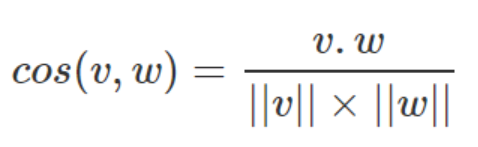

 Al dibujar nuestros vectores en el espacio, sabemos que cuanto mas cerca esten dos vectores, menor es el ángulo entre ellos, y la similitud será mayor. 
 
 Pongamos como ejemplo las frases 3, 5 y 6.

In [69]:
print(df.loc[2])
print(df.loc[4])
print(df.loc[5])

gustos    Te gusta cenar colacao con galletas
Edad                                       15
Name: 2, dtype: object
gustos    Me gusta desayunar avena con leche
Edad                                      14
Name: 4, dtype: object
gustos    Me gusta ese camion. Lleva avena y leche
Edad                                            14
Name: 5, dtype: object


**Ejemplo:** Que frases se parecen mas entre si? Vamos a crear una función que nos calcule la similitud entre frases.

In [70]:
def squared_sum(x):
    """ return 3 rounded square rooted value """
    return round(np.sqrt(sum([a*a for a in x])),3)

def cos_similarity(x,y):
    """ return cosine similarity between two lists """
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = squared_sum(x)*squared_sum(y)
    return round(numerator/float(denominator),3)

In [77]:
np.array(df_frases.loc[2])

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [72]:
import numpy as np
cos_similarity(np.array(df_frases.loc[2]), np.array(df_frases.loc[5]))

0.204

In [73]:
cos_similarity(np.array(df_frases.loc[2]), np.array(df_frases.loc[4])) 

0.25

In [74]:
cos_similarity(np.array(df_frases.loc[4]), np.array(df_frases.loc[5]))

0.612

# Ejercicio: Clasificador de noticias sobre COVID como verdaderas o falsas.


**Ejercicio: ** Preparar un dataset de texto para un modelo de regresión logística simple para clasificar las noticias de COVID en verdaderas o falsas, utilizando los datos recopilados por Susan Li.

https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/corona_fake.csv

Limpiaremos y preprocesaremos los datos de texto, realizaremos la extracción de características usando la biblioteca NLTK, construiremos e implementaremos un clasificador de regresión logística usando la biblioteca Scikit-Learn y evaluaremos la precisión del modelo al final.

**Ejercicio:** Carga el dataset.

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/corona_fake.csv')
df

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake
5,CORONA UNMASKED: Chinese Intelligence Officer ...,NaN,NaN,NaN
6,NaN,Urgent: Health Bulletin to the Public. Ministr...,Ministry of Health,Fake
7,NaN,"Pls tell ur families, relatives and friendsMOH...",NWLLAB,Fake
8,NaN,SERIOUS EXCELLENT ADVICE by Japanese doctors t...,Japanese doctors treating COVID-19 cases,Fake
9,Basic protective measures against the new coro...,Stay aware of the latest information on the CO...,https://www.who.int/emergencies/diseases/novel...,TRUE


**Ejercicio:** Cuantos valores únicos tiene el feature "label"? Unificalos todos a FAKE y TRUE. Elimina todos los registros que tengan el feature text o label como NaN.

array(['Fake', nan, 'TRUE', 'fake'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,FAKE
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,FAKE
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,FAKE
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,FAKE
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,FAKE


**Ejercicio:** 
Crea un nuevo dataframe que contenga la columna label y donde title y text esten unidos en otra columna llamada 'title_text'. Es decir, el dataframe tendrá 2 columnas: 'title_text' y label.

,title_text,label
0,Due to the recent outbreak for the Coronavirus...,FAKE
9,Basic protective measures against the new coro...,TRUE
14,Exposing yourself to the sun or to temperature...,TRUE
16,Being able to hold your breath for 10 seconds ...,TRUE
17,Drinking alcohol does not protect you against ...,TRUE


In [ ]:
df=df.dropna(subset='label')

**Ejercicio:** Que número de noticias falsas y verdaderas hay? Esta el dataset balanceado?

**Ejercicio:** Crea una función preprocessor que limpie y preprocese todos los textos. Presta especial atención a convertir todos los carácteres a minúscula, elimina los tags de html y los simbolos de puntuación. Utiliza esa función para limpiar todos los registros.

**Ejercicio:** Crea X_texto como la columna con los textos y usa CountVectorizer para vectorizar los textos. Crea un dataframe llamado df_frases que contenga el resultado.

**Ejercicio:** Crea X a partir de df_frases e y como una columna con label. Usa train_test_split para crear un subconjunto de entrenamiento y test.

**Ejercicio:** Usa scikitlearn para entrenar un modelo de regresión logística. 

**Ejercicio:** Que score obtenemos? Que métricas podemos usar para checkear nuestro modelo de clasificación?

**Ejercicio:** Que se te ocurre para mejorar el modelo?

In [ ]:
bilbio

https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/
    https://towardsdatascience.com/covid-fake-news-detection-with-a-very-simple-logistic-regression-34c63502e33b